#  Nathan Kong Data Science Project Workflow


In [88]:
import csv, pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime

data = pd.read_csv("checkin_dataset.csv", index_col = "Unnamed: 0")
sample = data.sample(frac=0.2) #pulling up the sample would be randomly 20% from the original data
sample.to_csv("sample_data.csv") #save the sample data
print(sample)

       user            timestamp  xcoordinate  ycoordinate
6820     20  2017-05-29 13:19:00     0.738853     0.590308
3889     60  2017-06-28 03:11:00     0.226085     0.133959
3303      2  2017-07-12 04:26:00     1.152051     1.319816
10797    37  2017-07-28 02:52:00    -0.117462     0.302504
19277    53  2017-05-24 07:48:00     0.868085     1.166225
6121      2  2017-07-17 08:06:00     0.750665     0.567830
23437    49  2017-06-06 22:38:00    -0.141518     0.048701
2289     99  2017-07-02 11:19:00    -0.080228    -0.078649
11372    17  2017-07-27 01:33:00     0.937890     0.901753
9172      0  2017-06-18 09:22:00     1.362724     0.872164
11805     0  2017-07-15 06:35:00     0.953442     0.904743
9869     94  2017-05-22 19:32:00     1.356819     0.871384
10447     1  2017-07-02 19:54:00    -0.129950     0.330323
20778     0  2017-07-16 17:42:00     0.968275     0.735029
25207    21  2017-07-04 07:59:00     0.946519     1.306004
20009    99  2017-06-12 11:04:00     0.824793     1.1478

In this project, I choose to use 20% of the original data as my sample. From the dataset, through the limit data provided, I try to analyze and find more useful information that can use or guide in the future. My purpose and goal is to use the data analysis to benefit not just the system in technology level but more the whole team and company. In general, I will focus on the axis coordinate, users' using time, and date & time as my analysis target.

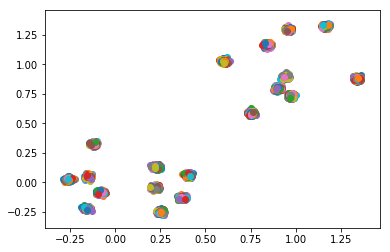

In [89]:
#1. use the x, y coordinate to analyze and identify the location. With the relavent location, we can push the local tech-news
#and local weather forecast
#2. According to their location by x, y coordinate, we can analyze where the majority users located at.
#Then, we will have the target location to do the ads promotion.

data = csv.DictReader(open("sample_data.csv", "r"))

for i in data:
    plt.scatter(i["xcoordinate"],i["ycoordinate"]) #create the scatter chart
    
plt.show()

According to the scatter chart above, we can see that there are some patterns for user's login location. There are three locations, x from -0.25 to 0 and y from -0.25 to 0, x from 0.25 to 0.45 and y from -0.25 to 0.2, and x around 1 and y from 0.75 to 1. So for the location focus, we can see them as three big cities. Based on this data, we can know where we are popular and those are our targeting cities. But, also, we can combine the geosptial location and the news and weather forecast. The GPS location would be the further use and keep updating the information. I think this is a good preliminary data for sales and marketing team to use.

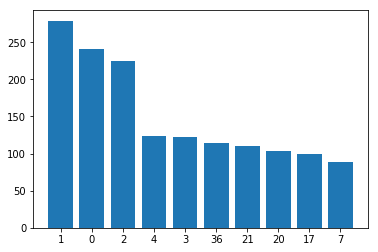

In [90]:
#3. Analyzing the user's login times, we can push some promotion or membership activities to those active users.

user_dic = {}
user_list = []

users = csv.DictReader(open("sample_data.csv", "r"))
for user in users:
    user_list.append(user["user"])

for i in user_list: #count and record users' log in time and pull into the dictionary
    if i in user_dic:
        user_dic[i] += 1
    else:
        user_dic[i] = 1

sort = sorted(user_dic.items(), key = lambda t:-t[1])[:10] #sort and choose top 10 users as the target
sort_dic = {}
for k in sort:
    sort_dic[k[0]] = k[1]

#print(sort_dic)
user = sort_dic.keys()
time = sort_dic.values()

plt.bar(range(len(user)), time, tick_label = user) #create the bar chart
plt.show()

In this part, my idea is to analyze the data and find out the most active users. In this case, we can see user 1, 0, 2, 4, 21, 36, 17, 3, 20, 7 are top 10 active users. For the future use, we can use the same method to analyze and lanuch the reward system such as membership and prize notification. Also, we can use this data to see the usage in certain time period so that other teams can change their marketing strategy.

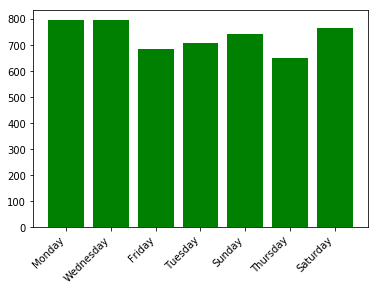

In [91]:
#4. We can also observe the login date to analyze the time activity pattern, like weekdays vs. weekend.

Dict = {}
lst = []

data = csv.DictReader(open("sample_data.csv", "r"))

for date in data:
    log_date = (date["timestamp"].split(" "))[0]
    log_date_num = log_date.split("-")
    new_date = datetime.date(int(log_date_num[0]), int(log_date_num[1]), int(log_date_num[2]))
    lst.append(new_date.strftime("%A")) #gather the information to translate from date to the weekdays 

for item in lst: #add data to the dictionary so that be easier to transform to the bar chart
    if item in Dict:
        Dict[item] += 1
    else:
        Dict[item] = 1

Day = Dict.keys()
Num = Dict.values()

plt.bar(range(len(Day)), Num, tick_label=Day, color = "green") #create the bar chart to see the usage per weekdays
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

The fourth idea is to use the time to track users' activity pattern. For example, I grab the timestamp data and tranform it to the weekdays. In here, what I want to analyze is if there is any relationship between the usage & pattern and each weekday. In the chart, we can see Monday and Saturday are the days that have the most log in times, maybe because Monday is the first day to go to work so people start to use the phone and app actively and read articles or news; and Saturday is the first day of the weekend so people have more time to use the app. With the further mining, we probably will see the deeper relationship, like month and certain time. It will be benefical for other teams to have decision-making and deep research. On the other side, keep tracking usage can find out the server load. For instance, if the next Monday the servers can hold the enough users for the servers. It can be also used as the reference for the DevOps team under the system & server operation. 